In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('RFM.csv', parse_dates=['SoldDate'])

In [3]:
sd = dt.datetime(2019,6,1)
df['hist']=sd - df['SoldDate']
df['hist'].astype('timedelta64[D]')
df['hist']=df['hist'] / np.timedelta64(1, 'D')
df.head()

,dealer_login,SoldDate,car_selling_price_total,hist
0,rapijayamotor,2019-05-31,84500000,1.0
1,nurfimobilindo,2019-05-31,116500000,1.0
2,navasuksesmotor,2019-05-31,123000000,1.0
3,af99mobilindo,2019-05-31,100000000,1.0
4,ulticarotogaleri,2019-05-31,248500000,1.0


In [4]:
rfmTable = df.groupby('dealer_login').agg({'hist': lambda x:x.min(), # Recency
                                        'dealer_login': lambda x: len(x),               # Frequency
                                        'car_selling_price_total': lambda x: x.sum()})          # Monetary Value

In [7]:
rfmTable.rename(columns={'hist': 'recency', 
                         'dealer_login': 'frequency', 
                         'car_selling_price_total': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
dealer_login,,,
45mobilindo,15.0,54,4455450000
47mobilindo,2.0,120,7001250000
abangmobilindo,9.0,3,369500000
abudzarmobilindo,1.0,90,10296000000
addammobil,6.0,12,1062300000


In [8]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25      3.0       2.25    2.981500e+08
0.50     13.0       6.00    6.327500e+08
0.75     37.0      17.75    1.943062e+09 <class 'pandas.core.frame.DataFrame'>


In [9]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 3.0, 0.5: 13.0, 0.75: 37.0},
 'frequency': {0.25: 2.25, 0.5: 6.0, 0.75: 17.75},
 'monetary_value': {0.25: 298150000.0, 0.5: 632750000.0, 0.75: 1943062500.0}}

In [10]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [11]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [12]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [13]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
dealer_login,,,,,,,
45mobilindo,15.0,54,4455450000,3,1,1,311
47mobilindo,2.0,120,7001250000,1,1,1,111
abangmobilindo,9.0,3,369500000,2,3,3,233
abudzarmobilindo,1.0,90,10296000000,1,1,1,111
addammobil,6.0,12,1062300000,2,2,2,222


In [14]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
dealer_login,,,,,,,
jgmotor,1.0,177,32575850010,1,1,1,111
banyumiliauto,1.0,332,24685650009,1,1,1,111
gogomobilindo,2.0,131,15383000000,1,1,1,111
lbauto,1.0,111,15062000000,1,1,1,111
abudzarmobilindo,1.0,90,10296000000,1,1,1,111
goldenmobilindo,1.0,73,9780411000,1,1,1,111
hensauto,2.0,51,8084000000,1,1,1,111
47mobilindo,2.0,120,7001250000,1,1,1,111
sanjayadeauto,1.0,43,6393000000,1,1,1,111


In [15]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    6.225311e+09
112    1.675200e+09
121    2.140291e+09
122    1.132021e+09
123    4.350000e+08
133    5.070714e+08
134    2.740000e+08
144    1.732500e+08
211    3.771543e+09
212    1.295385e+09
222    1.273271e+09
223    5.432500e+08
232    6.945000e+08
233    4.614281e+08
243    3.755000e+08
244    1.614375e+08
311    6.032450e+09
321    2.381667e+09
322    1.136315e+09
323    4.985000e+08
332    9.523000e+08
333    4.022825e+08
334    2.467500e+08
343    3.613000e+08
344    1.611875e+08
411    2.936000e+09
422    1.402858e+09
423    5.812500e+08
432    7.242333e+08
433    4.345000e+08
434    2.256667e+08
442    7.210000e+08
443    4.160000e+08
444    1.537500e+08
Name: monetary_value, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 45mobilindo to zaramotor
Data columns (total 8 columns):
recency           278 non-null float64
frequency         278 non-null int64
monetary_value    278 non-null int64
R_Quartile        278 non-null int64
F_Quartile        278 non-null int64
M_Quartile        278 non-null int64
RFMClass          278 non-null object
Total Score       278 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 19.5+ KB
                  recency  frequency  monetary_value  R_Quartile  F_Quartile  \
dealer_login                                                                   
45mobilindo          15.0         54      4455450000           3           1   
47mobilindo           2.0        120      7001250000           1           1   
abangmobilindo        9.0          3       369500000           2           3   
abudzarmobilindo      1.0         90     10296000000           1           1   
addammobil            6.0         12      1

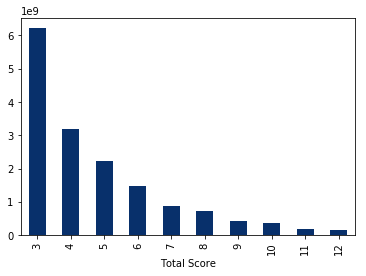

In [18]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] + rfmSeg['M_Quartile'] 
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')
print(rfmSeg.head(), rfmSeg.info())

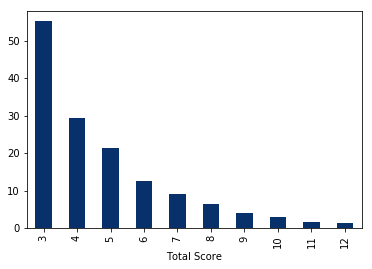

In [19]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

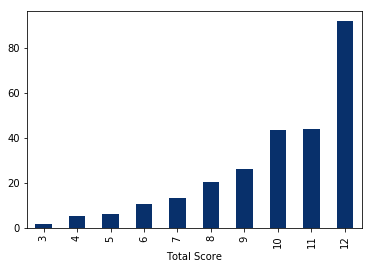

In [20]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [21]:
export_csv = rfmSeg.to_csv("RFM_Seg_Analysis.csv")

In [ ]:
b